In [1]:
# suggestions
# use MMSeq2 API for Unitprot mapping
# DisProt training first

In [2]:
import os
import sys
import json
import torch
import keras
import numpy as np
import tensorflow as tf
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


sys.path.append(str(Path().resolve().parent))

from src.arch import DeepEntropy

In [3]:
# loading embedding

nmr_data = torch.load(Path().resolve().parent / "data/embeddings/nmr_filtered.pt")

nmr_embeddings = []
nmr_plddt = []
nmr_gscores = []
for nmr_ele in nmr_data:

    sample_embedding_tf = tf.convert_to_tensor(nmr_ele["embedding"].numpy(), dtype=tf.float32)
    sample_embedding_tf = tf.expand_dims(sample_embedding_tf, axis=0)

    sample_plddt_tf = tf.convert_to_tensor(nmr_ele["plddt"], dtype=tf.float32)
    sample_plddt_tf = tf.expand_dims(sample_plddt_tf, axis=0)

    cleaned_NMR_gscores = [0.0 if v is None else v for v in nmr_ele["gscores"]]
    NMR_gscores_tf = tf.convert_to_tensor(cleaned_NMR_gscores, dtype=tf.float32)
    NMR_gscores_tf = tf.expand_dims(NMR_gscores_tf, axis=0)

    if sample_embedding_tf.shape[2] != 1024:
        print(f"Erorr in embedding dimension! {sample_embedding_tf.shape[1]}")
    elif (sample_embedding_tf.shape[1] != sample_plddt_tf.shape[1]) or (sample_embedding_tf.shape[1] != NMR_gscores_tf.shape[1]):
        print("Unmatching dimension!")
    else:
        nmr_embeddings.append(sample_embedding_tf)
        nmr_plddt.append(sample_plddt_tf)
        nmr_gscores.append(NMR_gscores_tf)


In [4]:
print(len(nmr_embeddings))

994


In [5]:
disprot_data = torch.load(Path().resolve().parent / "data/embeddings/disprot_merged.pt")

disprot_embeddings = []
disprot_plddt = []
disprot_disorder_values = []
for disprot_ele in disprot_data:
    try:
        sample_embedding_tf = tf.convert_to_tensor(disprot_ele["embedding"].numpy(), dtype=tf.float32)
        sample_embedding_tf = tf.expand_dims(sample_embedding_tf, axis=0)

        sample_plddt_tf = tf.convert_to_tensor(disprot_ele["plddt"], dtype=tf.float32)
        sample_plddt_tf = tf.expand_dims(sample_plddt_tf, axis=0)

        disprot_disorder_tf = tf.convert_to_tensor([disprot_ele["disorder_content"]], dtype=tf.float32)
        disprot_disorder_tf = tf.expand_dims(disprot_disorder_tf, axis=0)


        if sample_embedding_tf.shape[2] != 1024:
            print(f"Erorr in embedding dimension! {sample_embedding_tf.shape[1]}")
        elif (sample_embedding_tf.shape[1] != sample_plddt_tf.shape[1]):
            print(f"Unmatching dimension! {sample_embedding_tf.shape[1]},{sample_plddt_tf.shape[1]}")
        else:
            disprot_embeddings.append(sample_embedding_tf)
            disprot_plddt.append(sample_plddt_tf)
            disprot_disorder_values.append(disprot_disorder_tf)
    except Exception as e:
        print(f"some error occured! Error message: {e}")

Unmatching dimension! 955,239
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Error message: 'plddt'
some error occured! Erro

In [6]:
print(len(disprot_embeddings))

2269


In [7]:
softDis_data = torch.load(Path().resolve().parent / "data/embeddings/softdis_merged.pt")

softDis_embeddings = []
softDis_plddt = []
softDis_disorder_values = []
for softDis_ele in softDis_data:
    try:
        sample_embedding_tf = tf.convert_to_tensor(softDis_ele["embedding"].numpy(), dtype=tf.float32)
        sample_embedding_tf = tf.expand_dims(sample_embedding_tf, axis=0)

        sample_plddt_tf = tf.convert_to_tensor(softDis_ele["plddt"], dtype=tf.float32)
        sample_plddt_tf = tf.expand_dims(sample_plddt_tf, axis=0)

        softDis_disorder_tf = tf.convert_to_tensor(softDis_ele["soft_disorder_frequency"], dtype=tf.float32)
        softDis_disorder_tf = tf.expand_dims(softDis_disorder_tf, axis=0)

        if sample_embedding_tf.shape[2] != 1024:
            print(f"Erorr in embedding dimension! {sample_embedding_tf.shape[1]}")
        elif (sample_embedding_tf.shape[1] != sample_plddt_tf.shape[1]) or (sample_embedding_tf.shape[1] != softDis_disorder_tf.shape[1]):
            print("Unmatching dimension!")
        else:
            softDis_embeddings.append(sample_embedding_tf)
            softDis_plddt.append(sample_plddt_tf)
            softDis_disorder_values.append(softDis_disorder_tf)
    except Exception as e:
        print(f"some error occured! Error message: {e}")

Unmatching dimension!
Unmatching dimension!
Unmatching dimension!
Unmatching dimension!


In [8]:
print(len(softDis_embeddings))

4118


In [9]:
# temporarily reducing sample size
# nmr_embeddings = nmr_embeddings[:10]
# nmr_plddt = nmr_plddt[:10]
# nmr_gscores = nmr_gscores[:10]

disprot_embeddings = disprot_embeddings[:1000]
disprot_plddt = disprot_plddt[:1000]
disprot_disorder_values = disprot_disorder_values[:1000]

softDis_embeddings = softDis_embeddings[:1000]
softDis_plddt = softDis_plddt[:1000]
softDis_disorder_values = softDis_disorder_values[:1000]

In [10]:
entropy = DeepEntropy()
print(entropy.encoder.summary())
print(entropy.nmr_head_model.summary())
print(entropy.DisProt_head_model.summary())
print(entropy.softdis_head_model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ embeddings          │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ plddt (InputLayer)  │ (None, None, 1)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, None, 64)  │    196,672 │ embeddings[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, None, 64)  │        256 │ plddt[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, None, 32)  │      6,176 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, None, 32)  │      6,176 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, None, 16)  │      1,552 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, None, 16)  │      1,552 │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, None, 8)   │        392 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, None, 8)   │        392 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, None, 16)  │          0 │ conv1d_3[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_7[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 213,168 (832.69 KB)

 Trainable params: 213,168 (832.69 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ combined_features (InputLayer)  │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 64)       │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, None, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ g_scores (Dense)                │ (None, None, 1)        │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ combined_features (InputLayer)  │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, None, 64)       │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, None, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ disorder_content (Dense)        │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ combined_features (InputLayer)  │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, None, 64)       │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, None, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ soft_disorder_frequency (Dense) │ (None, None, 1)        │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
EPOCHS = 20
LEARNING_RATE = 0.001

In [12]:

# Compile the model
entropy.compile(
    NMR_optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    DisProt_optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    SoftDis_optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    NMR_head_loss_fn = keras.losses.MeanSquaredError(),
    DisProt_head_loss_fn = keras.losses.MeanSquaredError(),
    SoftDis_head_loss_fn = keras.losses.MeanSquaredError()
)

In [15]:
# nmr_loss_per_epoc = []
# disprot_loss_per_epoc = []
# softdis_loss_per_epoc = []

# for epoch in range(EPOCHS):
#     print(f"Epoch: {epoch+1}")
#     nmr_loss_per_sample = []
#     disprot_loss_per_sample = []
#     softdis_loss_per_sample = []

#     print(f"NMR head training epoch: {epoch+1}")
#     for idx in range(len(nmr_embeddings)):
#         entropy.target_flag_ = "g_scores"
#         data = (nmr_embeddings[idx], nmr_plddt[idx], nmr_gscores[idx])
#         history = entropy.fit(data)
#         nmr_loss_per_sample.append(history.history['loss'][0])

#     nmr_loss_per_epoc.append(sum(nmr_loss_per_sample) / len(nmr_loss_per_sample))

#     print(f"DisProt head training epoch: {epoch+1}")
#     for idx in range(len(disprot_embeddings)):
#         entropy.target_flag_ = "disprot_disorder"
#         data = (disprot_embeddings[idx], disprot_plddt[idx], disprot_disorder_values[idx])
#         history = entropy.fit(data)
#         disprot_loss_per_sample.append(history.history['loss'][0])

#     disprot_loss_per_epoc.append(sum(disprot_loss_per_sample) / len(disprot_loss_per_sample))

#     print(f"SoftDis head training epoch: {epoch+1}")
#     for idx in range(len(softDis_embeddings)):
#         entropy.target_flag_ = "softdis_disorder"
#         data = (softDis_embeddings[idx], softDis_plddt[idx], softDis_disorder_values[idx])
#         history = entropy.fit(data)
#         softdis_loss_per_sample.append(history.history['loss'][0])

#     softdis_loss_per_epoc.append(sum(softdis_loss_per_sample) / len(softdis_loss_per_sample))

import random
combined_data = []

# for idx in range(len(nmr_embeddings)):
#     combined_data.append((nmr_embeddings[idx], nmr_plddt[idx], nmr_gscores[idx], "g_scores"))

for idx in range(len(disprot_embeddings)):
    combined_data.append((disprot_embeddings[idx], disprot_plddt[idx], disprot_disorder_values[idx], "disprot_disorder"))

for idx in range(len(softDis_embeddings)):
    combined_data.append((softDis_embeddings[idx], softDis_plddt[idx], softDis_disorder_values[idx], "softdis_disorder"))

# nmr_loss_per_epoc = []
disprot_loss_per_epoc = []
softdis_loss_per_epoc = []

# nmr_loss_per_sample_total = []
disprot_loss_per_sample_total = []
softdis_loss_per_sample_total = []

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch + 1}")
    random.shuffle(combined_data)

    nmr_loss, disprot_loss, softdis_loss = [], [], []

    for input_embeddings, input_plddt, target, task_flag in combined_data:
        if task_flag == "g_scores":
            print(f"NMR head : epoch {epoch + 1}")
        elif task_flag == "disprot_disorder":
            print(f"DisProt head : epoch {epoch + 1}")
        else:
            print(f"SoftDis head : epoch {epoch + 1}")

        entropy.target_flag_ = task_flag
        data = (input_embeddings, input_plddt, target)
        history = entropy.fit(data)
        loss = history.history['loss'][0]

        if task_flag == "g_scores":
            nmr_loss.append(loss)
        elif task_flag == "disprot_disorder":
            disprot_loss.append(loss)
        else:
            softdis_loss.append(loss)

    # nmr_loss_per_epoc.append(sum(nmr_loss) / len(nmr_loss) if nmr_loss else None)
    disprot_loss_per_epoc.append(sum(disprot_loss) / len(disprot_loss) if disprot_loss else None)
    softdis_loss_per_epoc.append(sum(softdis_loss) / len(softdis_loss) if softdis_loss else None)

    # nmr_loss_per_sample_total.extend(nmr_loss)
    disprot_loss_per_sample_total.extend(disprot_loss)
    softdis_loss_per_sample_total.extend(softdis_loss)




Epoch 1
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1986
DisProt head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0238
DisProt head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.6342e-04
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1549
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1066
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0897
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2170
DisProt head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0071
DisProt head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0167
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1069
DisProt head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8685
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1192
SoftDis head : epoch 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1164
D

KeyboardInterrupt: 

In [16]:
# print(nmr_loss_per_epoc)
print(disprot_loss_per_epoc)
print(softdis_loss_per_epoc)

[0.07441825972243168, 0.05465544792181754, 0.04921764684951995, 0.043690657372795615, 0.04042363896215465, 0.03702121137613085, 0.034570637993580934, 0.03243277872034469, 0.030805528561401844, 0.028456875215397304, 0.02745128498507711, 0.025789584643163836, 0.024047641864481193, 0.023607099531427592]
[0.08582014248147607, 0.07750254267267882, 0.07356588519364596, 0.07072641230281443, 0.06664669742900878, 0.06293806895334274, 0.05869003855157644, 0.055980983028188346, 0.05156637311354279, 0.04890466212900355, 0.04569775787764229, 0.04344133305968717, 0.04074962535942905, 0.03909373018273618]


In [18]:
timestamp = datetime.now().strftime("%Y_%m_%d_%H_%M_%S_mixed_disprot_softdis_1000")
dir_path = f"{str(Path().resolve().parent)}/data/models/{timestamp}"
os.makedirs(dir_path, exist_ok=True)

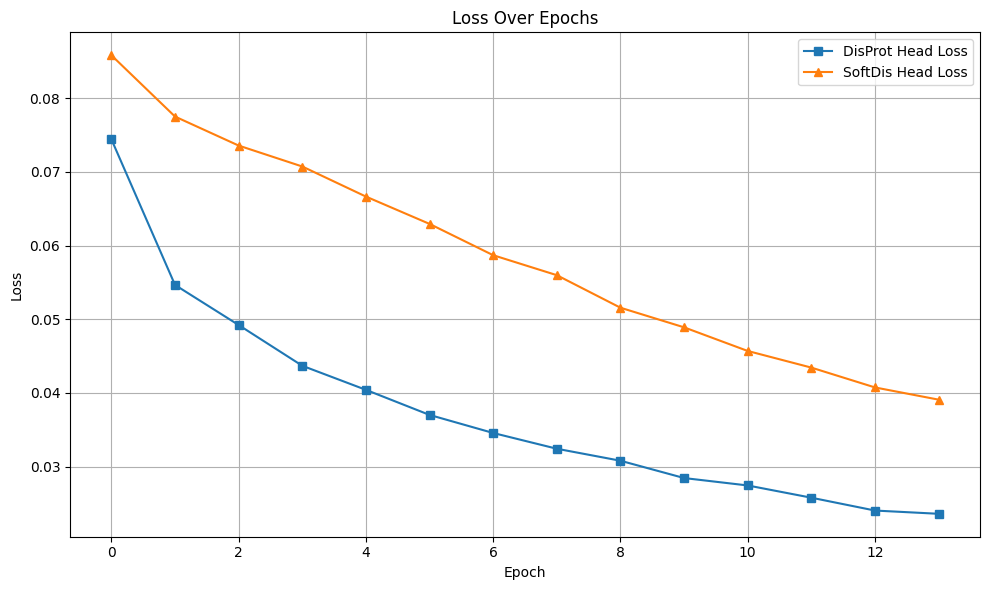

In [19]:
epochs = [i for i in range(len(disprot_loss_per_epoc))]

plt.figure(figsize=(10, 6))
# plt.plot(epochs, nmr_loss_per_epoc, label='NMR Head Loss', marker='o')
plt.plot(epochs, disprot_loss_per_epoc, label='DisProt Head Loss', marker='s')
plt.plot(epochs, softdis_loss_per_epoc, label='SoftDis Head Loss', marker='^')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
full_path = os.path.join(dir_path, "loss_curve_per_epochs.png")
plt.savefig(full_path)
plt.show()

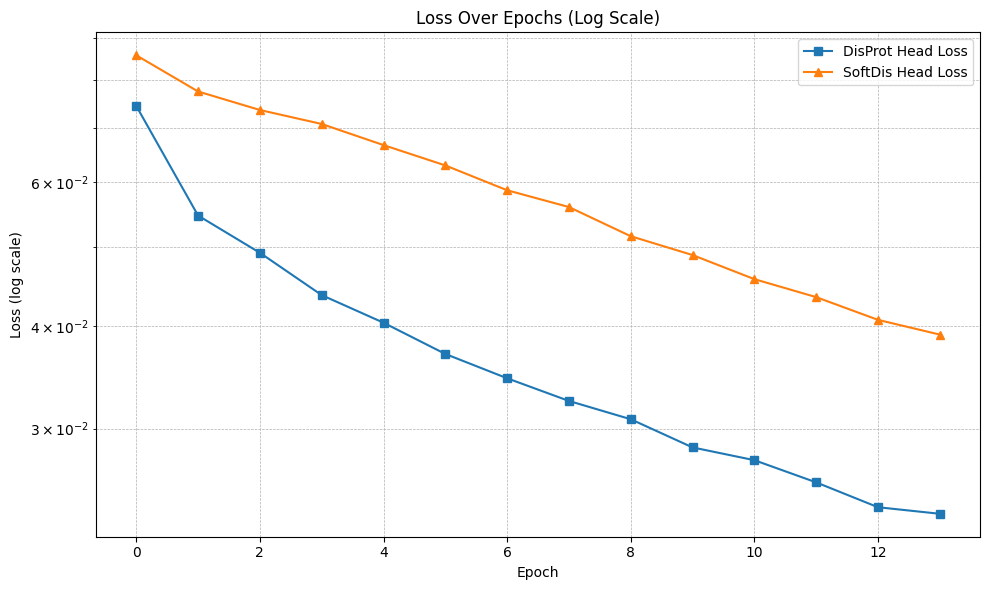

In [20]:
plt.figure(figsize=(10, 6))

# plt.plot(epochs, nmr_loss_per_epoc, label='NMR Head Loss', marker='o')
plt.plot(epochs, disprot_loss_per_epoc, label='DisProt Head Loss', marker='s')
plt.plot(epochs, softdis_loss_per_epoc, label='SoftDis Head Loss', marker='^')

plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Loss Over Epochs (Log Scale)")
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
full_path = os.path.join(dir_path, "log_loss_curve_per_epochs.png")
plt.savefig(full_path)
plt.show()


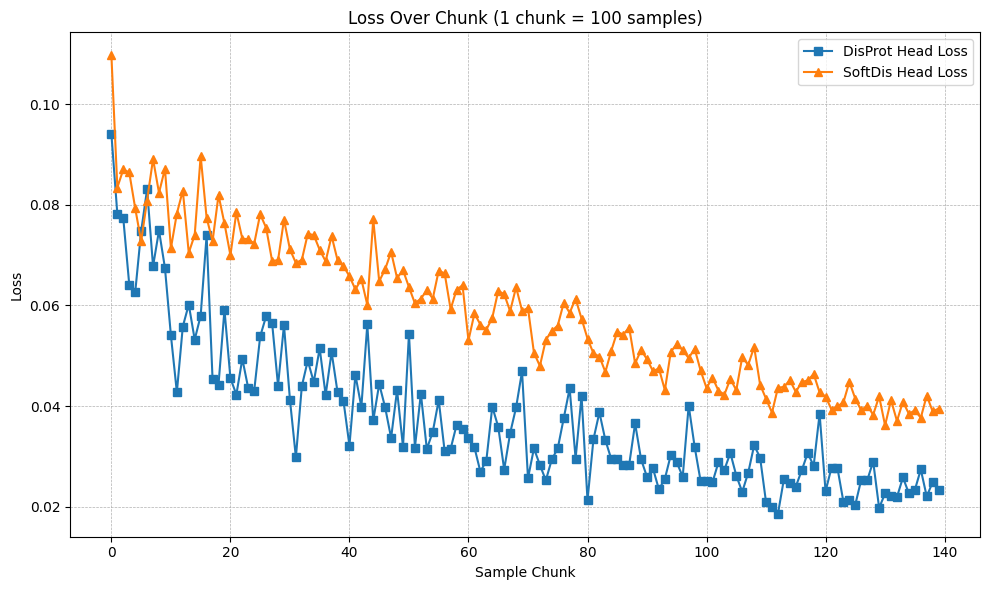

In [24]:
chunk_size = 100
# nmr_loss_per_sample_smooth = [
#     sum(nmr_loss_per_sample_total[i:i+chunk_size]) / len(nmr_loss_per_sample_total[i:i+chunk_size])
#     for i in range(0, len(nmr_loss_per_sample_total), chunk_size)
# ]
disprot_loss_per_sample_smooth = [
    sum(disprot_loss_per_sample_total[i:i+chunk_size]) / len(disprot_loss_per_sample_total[i:i+chunk_size])
    for i in range(0, len(disprot_loss_per_sample_total), chunk_size)
]
softdis_loss_per_sample_smooth = [
    sum(softdis_loss_per_sample_total[i:i+chunk_size]) / len(softdis_loss_per_sample_total[i:i+chunk_size])
    for i in range(0, len(softdis_loss_per_sample_total), chunk_size)
]


epochs = list(range(len(disprot_loss_per_sample_smooth)))

plt.figure(figsize=(10, 6))

# plt.plot(epochs, nmr_loss_per_sample_smooth, label='NMR Head Loss', marker='o')
plt.plot(epochs, disprot_loss_per_sample_smooth, label='DisProt Head Loss', marker='s')
plt.plot(epochs, softdis_loss_per_sample_smooth, label='SoftDis Head Loss', marker='^')

plt.xlabel("Sample Chunk")
plt.ylabel("Loss")
plt.title(f"Loss Over Chunk (1 chunk = {chunk_size} samples)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
full_path = os.path.join(dir_path, "loss_curve_per_sample_100.png")
plt.savefig(full_path)
plt.show()
